### 코로나 데이터 분석

## 프로젝트 목차
1. **데이터 불러오기
<br> 
2. **데이터 정제하기
<br>
3. **데이터 시각화

## 데이터 출처
-  https://www.data.go.kr/tcs/dss/selectFileDataDetailView.do?publicDataPk=15063273

---

## 1. 데이터 불러오기

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# 상위 5개의 데이터를 출력
corona_all_data = pd.read_csv("./Seoul_Covid.csv")
corona_all_data.head()

,연번,확진일,환자번호,국적,환자정보,지역,여행력,접촉력,조치사항,상태,이동경로,등록일,수정일,노출여부
0,5748,10.21.,25530,NaN,NaN,양천구,NaN,감염경로 조사중,NaN,NaN,NaN,2020-10-22 10:58,2020-10-22 10:58,Y
1,5747,10.21.,25528,NaN,NaN,강동구,NaN,강남서초 지인모임,NaN,NaN,NaN,2020-10-22 10:58,2020-10-22 10:58,Y
2,5746,10.21.,25525,NaN,NaN,강남구,NaN,기타 확진자 접촉,NaN,NaN,NaN,2020-10-22 10:58,2020-10-22 10:58,Y
3,5745,10.21.,25517,NaN,NaN,관악구,NaN,감염경로 조사중,NaN,NaN,NaN,2020-10-22 10:58,2020-10-22 10:58,Y
4,5744,10.21.,25504,NaN,NaN,관악구,NaN,기타 확진자 접촉,NaN,NaN,NaN,2020-10-22 10:58,2020-10-22 10:58,Y


In [3]:
# data frame 정보를 요약하여 출력
corona_all_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5748 entries, 0 to 5747
Data columns (total 14 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   연번      5748 non-null   int64  
 1   확진일     5748 non-null   object 
 2   환자번호    5748 non-null   int64  
 3   국적      0 non-null      float64
 4   환자정보    0 non-null      float64
 5   지역      5748 non-null   object 
 6   여행력     459 non-null    object 
 7   접촉력     5748 non-null   object 
 8   조치사항    0 non-null      float64
 9   상태      5357 non-null   object 
 10  이동경로    5520 non-null   object 
 11  등록일     5748 non-null   object 
 12  수정일     5748 non-null   object 
 13  노출여부    5748 non-null   object 
dtypes: float64(3), int64(2), object(9)
memory usage: 628.8+ KB


---

## 2. 데이터 정제하기

In [4]:
corona_del_data = corona_all_data.drop(columns=['국적','환자정보','조치사항'])
corona_del_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5748 entries, 0 to 5747
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   연번      5748 non-null   int64 
 1   확진일     5748 non-null   object
 2   환자번호    5748 non-null   int64 
 3   지역      5748 non-null   object
 4   여행력     459 non-null    object
 5   접촉력     5748 non-null   object
 6   상태      5357 non-null   object
 7   이동경로    5520 non-null   object
 8   등록일     5748 non-null   object
 9   수정일     5748 non-null   object
 10  노출여부    5748 non-null   object
dtypes: int64(2), object(9)
memory usage: 494.1+ KB


---

## 3. 데이터 시각화

In [5]:
# 월별 일별 확진자 분석을 위해 날짜 데이터를 나누기
corona_del_data['확진일']

0       10.21.
1       10.21.
2       10.21.
3       10.21.
4       10.21.
         ...  
5743     1.31.
5744     1.30.
5745     1.30.
5746     1.30.
5747     1.24.
Name: 확진일, Length: 5748, dtype: object

In [6]:
def li_head(s, n):
    for i in range(n):
        print(s[i], end=" ")

In [7]:
month = []
day = []

for data in corona_del_data['확진일']:
    month.append(data.split('.')[0])
    day.append(data.split('.')[1])



li_head(month,5)
print()
li_head(day,5)

10 10 10 10 10 
21 21 21 21 21 

In [8]:
corona_del_data['month'] = month
corona_del_data['day'] = day

corona_del_data['month'].astype('int64')
corona_del_data['day'].astype('int64')

0       21
1       21
2       21
3       21
4       21
        ..
5743    31
5744    30
5745    30
5746    30
5747    24
Name: day, Length: 5748, dtype: int64

---

#### 월 별 확진자 수

Seaborn은 Matplotlib을 기반으로 다양한 색상 테마와 통계용 차트 등의 기능을 추가한 시각화 패키지이다. 
기본적인 시각화 기능은 Matplotlib 패키지에 의존하며 통계 기능은 Statsmodels 패키지에 의존한다.

In [9]:
order = []
for i in range(1,11):
    order.append(str(i))
order

['1', '2', '3', '4', '5', '6', '7', '8', '9', '10']

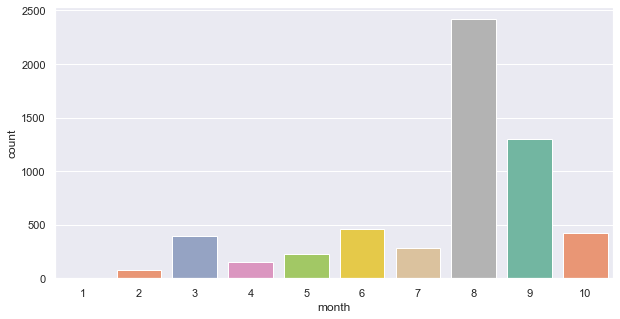

In [10]:
plt.figure(figsize=(10,5))
sns.set(style='darkgrid')
ax = sns.countplot(x='month', data = corona_del_data, palette="Set2", order = order)

<AxesSubplot:>

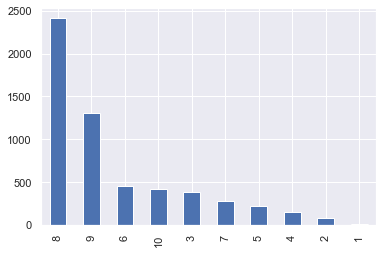

In [11]:
# series의 plot 함수를 이용한 출력 방법
corona_del_data['month'].value_counts().plot(kind='bar')

In [12]:
corona_del_data['month'].value_counts()

8     2416
9     1304
6      460
10     425
3      391
7      281
5      228
4      156
2       80
1        7
Name: month, dtype: int64

---

#### 8월달 일별 확진자 수

In [13]:
order2=[]
for i in range(1,32):
    order2.append(str(i))
order2

['1',
 '2',
 '3',
 '4',
 '5',
 '6',
 '7',
 '8',
 '9',
 '10',
 '11',
 '12',
 '13',
 '14',
 '15',
 '16',
 '17',
 '18',
 '19',
 '20',
 '21',
 '22',
 '23',
 '24',
 '25',
 '26',
 '27',
 '28',
 '29',
 '30',
 '31']

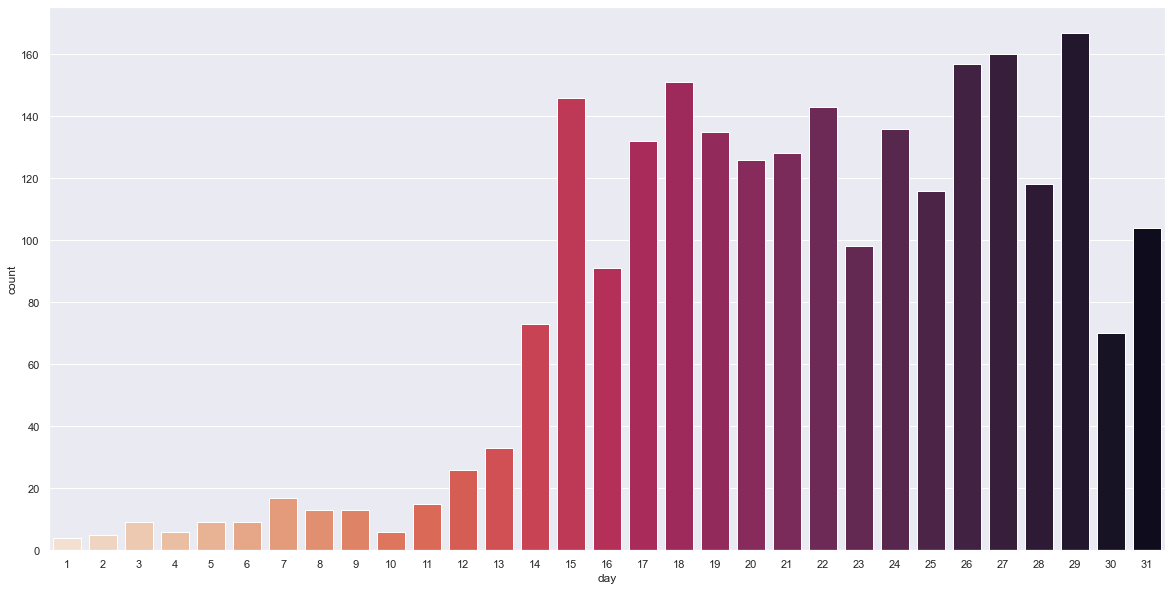

In [14]:
plt.figure(figsize=(20,10))
sns.set(style='darkgrid')
# ax = sns.countplot(x='day', data=corona_del_data[corona_del_data["month"] == '8'], 
#                    palette="Set2", order=order2)
ax2 = sns.countplot(x='day', data=corona_del_data[corona_del_data["month"] == '8'], 
                   palette="rocket_r", order=order2)

---
#### 8월 평균 일별 확진자 수

In [15]:
corona_del_data[corona_del_data['month']=='8']['day'].count()/31

77.93548387096774

In [16]:
corona_del_data[corona_del_data['month']=='8']['day'].value_counts().mean()

77.93548387096774

#### 지역별 확진자 수

In [17]:
corona_del_data['지역']

0       양천구
1       강동구
2       강남구
3       관악구
4       관악구
       ... 
5743    성북구
5744    마포구
5745    종로구
5746    중랑구
5747    강서구
Name: 지역, Length: 5748, dtype: object

In [18]:
import matplotlib.font_manager as fm
font_dirs = ['/usr/share/fonts/truetype/nanum', ]
font_files = fm.findSystemFonts(fontpaths=font_dirs)

for font_file in font_files:
    fm.fontManager.addfont(font_file)

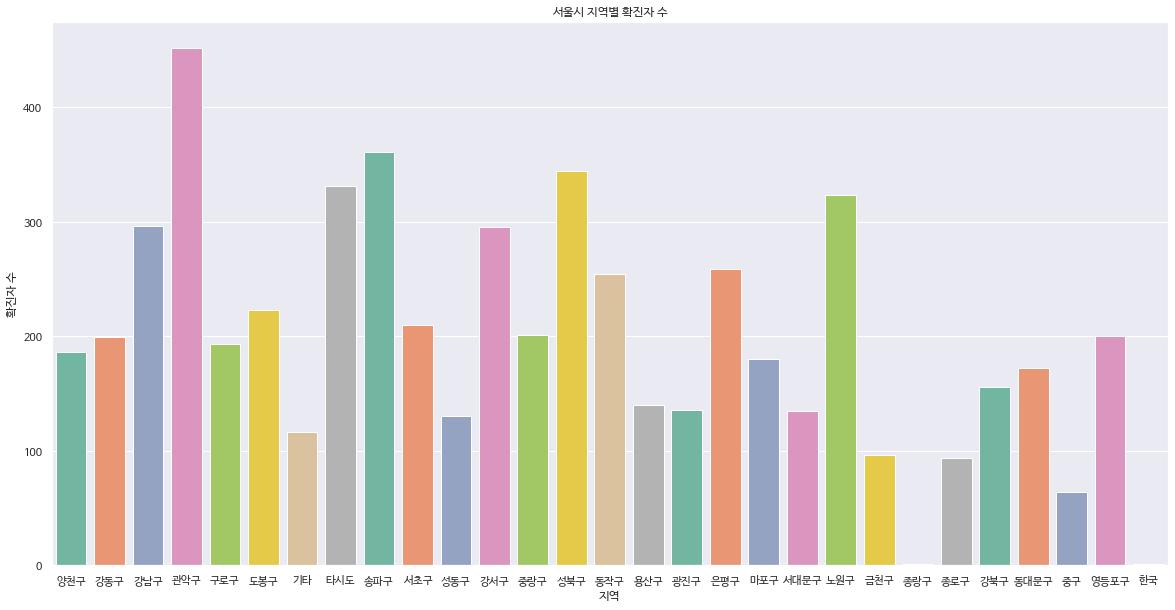

In [19]:
plt.figure(figsize=(20,10))

sns.set(font="NanumBarunGothic", 
        rc={"axes.unicode_minus":False},
        style='darkgrid')
ax = sns.countplot(x="지역", data=corona_del_data, palette="Set2")
plt.xlabel('지역')
plt.ylabel('확진자 수')
plt.title("서울시 지역별 확진자 수")
plt.show()

한국이라고 쓰여있는 이상 데이터 삭제
종랑구 -> 중랑구 오타 수정

In [20]:
corona_area = corona_del_data.replace({"종랑구":"중랑구", "한국":"기타"})

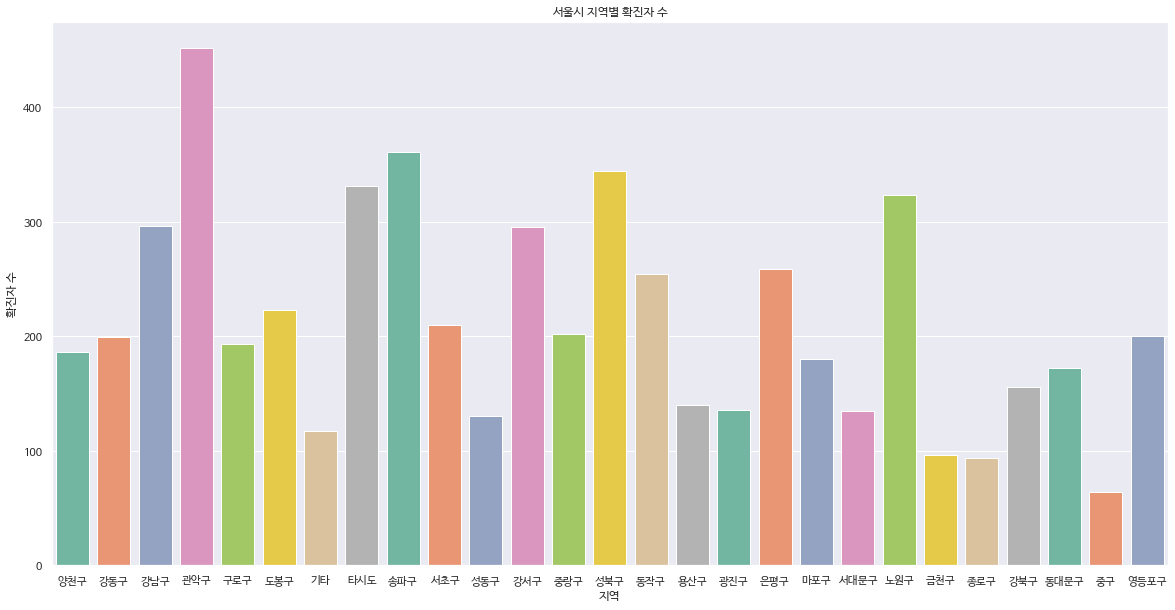

In [21]:
plt.figure(figsize=(20,10))
ax = sns.countplot(x="지역", data=corona_area, palette="Set2")
plt.xlabel('지역')
plt.ylabel('확진자 수')
plt.title("서울시 지역별 확진자 수")
plt.show()

In [22]:
corona_area[corona_del_data['month'] == '8']

,연번,확진일,환자번호,지역,여행력,접촉력,상태,이동경로,등록일,수정일,노출여부,month,day
1271,4477,8.31.,20132,타시도,NaN,감염경로 조사중,퇴원,이동경로 공개기간 경과,2020-10-22 10:58,2020-10-23 9:00,Y,8,31
1272,4476,8.25.,17968,타시도,NaN,성북구 사랑제일교회 관련,NaN,이동경로 공개기간 경과,2020-10-22 10:58,2020-10-23 9:00,Y,8,25
1273,4475,8.26.,18821,타시도,NaN,타시도 확진자 접촉,퇴원,이동경로 공개기간 경과,2020-10-22 10:58,2020-10-23 9:00,Y,8,26
1274,4474,8.27.,18818,타시도,NaN,기타 확진자 접촉,퇴원,이동경로 공개기간 경과,2020-10-22 10:58,2020-10-23 9:00,Y,8,27
1504,4244,8.30.,20116,타시도,NaN,감염경로 조사중,퇴원,이동경로 공개기간 경과,2020-10-22 10:58,2020-10-23 9:00,Y,8,30
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4140,1608,8.2.,14382,용산구,일본,해외 접촉 추정,퇴원,이동경로 공개기간 경과,2020-10-22 10:58,2020-10-23 9:00,Y,8,2
4141,1607,8.1.,14364,양천구,NaN,송파구 확진자 접촉,퇴원,이동경로 공개기간 경과,2020-10-22 10:58,2020-10-23 9:00,Y,8,1
4142,1606,8.1.,14362,종로구,NaN,종로구 지인모임 신명투자,퇴원,이동경로 공개기간 경과,2020-10-22 10:58,2020-10-23 9:00,Y,8,1
4144,1604,8.1.,14366,강서구,NaN,강서구 요양시설관련,퇴원,이동경로 공개기간 경과,2020-10-22 10:58,2020-10-23 9:00,Y,8,1


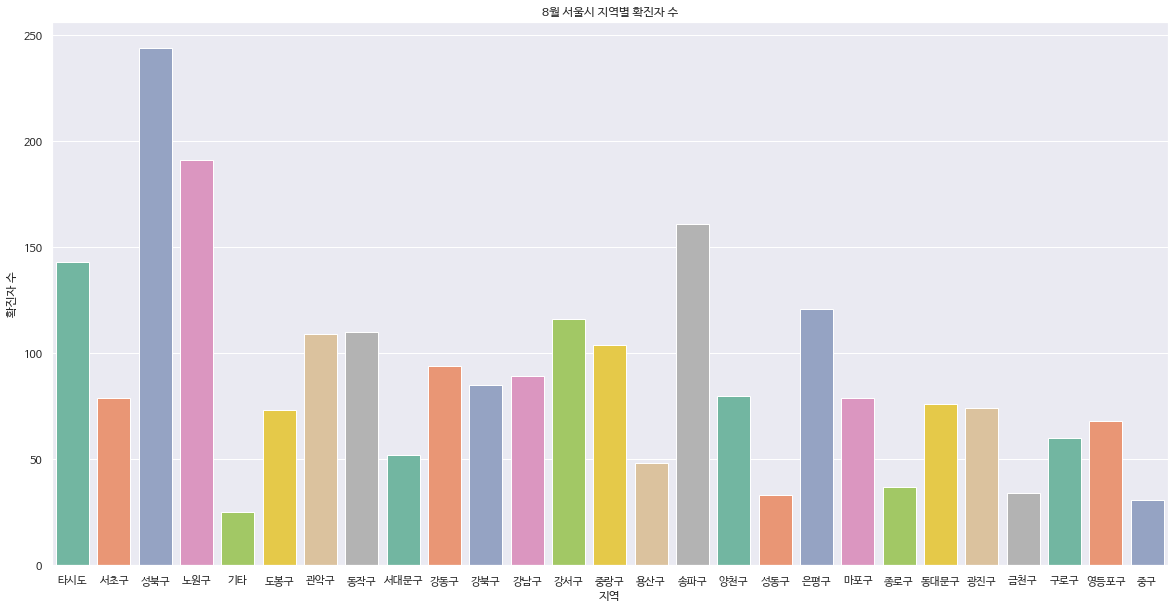

In [23]:
plt.figure(figsize=(20,10))
ax = sns.countplot(x="지역", data= corona_area[corona_del_data['month']=='8'], palette="Set2") 
plt.xlabel('지역')
plt.ylabel('확진자 수')
plt.title("8월 서울시 지역별 확진자 수")
plt.show()

관악구의 확진자 수가 가장 많았다. 
월별 증가율을 그래프로 그려보자.

In [24]:
corona_area['month'][corona_area['지역'] == "관악구"]

3       10
4       10
6       10
7       10
8       10
        ..
5630     3
5661     2
5674     2
5695     2
5711     2
Name: month, Length: 452, dtype: object

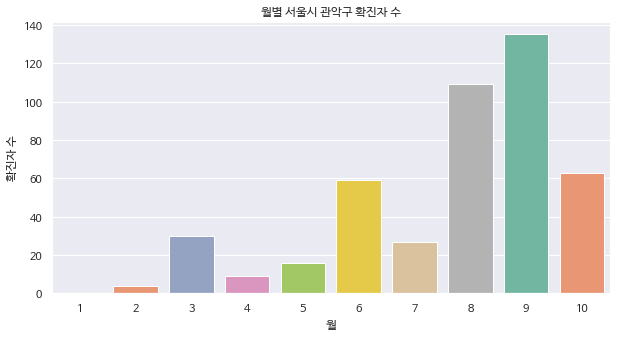

In [25]:
plt.figure(figsize=(10,5))
sns.set(font="NanumBarunGothic", 
        rc={"axes.unicode_minus":False},
        style='darkgrid')
ax = sns.countplot(x="month", data = corona_area[corona_area["지역"]=="관악구"], 
                   palette="Set2", order = order)
plt.xlabel("월")
plt.ylabel("확진자 수")
plt.title("월별 서울시 관악구 확진자 수")
plt.show()

In [26]:
import folium

# Map 함수를 사용하여 지도를 출력합니다.
map_f = folium.Map(location=[37.529622, 126.984307], zoom_start=11)

map_f

지역마다 지도에 정보를 출력하려면 지역의 좌표가 필요하다.
데이터 출처: https://data.seoul.go.kr/dataList/OA-11677/S/1/datasetView.do

In [27]:
seoul_area = pd.read_csv("./Seoul_Area.csv")
seoul_area

,순번,시군구코드,시군구명_한글,시군구명_영문,ESRI_PK,위도,경도
0,1,11320,도봉구,Dobong-gu,0,37.665861,127.031767
1,2,11380,은평구,Eunpyeong-gu,1,37.617612,126.922700
2,3,11230,동대문구,Dongdaemun-gu,2,37.583801,127.050700
3,4,11590,동작구,Dongjak-gu,3,37.496504,126.944307
4,5,11545,금천구,Geumcheon-gu,4,37.460097,126.900155
5,6,11530,구로구,Guro-gu,5,37.495486,126.858121
6,7,11110,종로구,Jongno-gu,6,37.599100,126.986149
7,8,11305,강북구,Gangbuk-gu,7,37.646995,127.014716
8,9,11260,중랑구,Jungnang-gu,8,37.595379,127.093967
9,10,11680,강남구,Gangnam-gu,9,37.495985,127.066409


In [28]:
seoul_area[seoul_area['시군구명_한글'] == '중구']

,순번,시군구코드,시군구명_한글,시군구명_영문,ESRI_PK,위도,경도
11,12,11140,중구,Jung-gu,11,37.557945,126.99419


In [29]:
corona_seoul = corona_area.drop(corona_area[corona_area['지역']=='타시도'].index)
corona_seoul = corona_seoul.drop(corona_area[corona_area['지역'] == '기타'].index)

map_f = folium.Map(location=[37.557945, 126.99419], zoom_start=11)
for i in set(corona_seoul['지역']):
    cnt = len(corona_seoul[corona_seoul['지역']==i])
    seoul_r = seoul_area[seoul_area['시군구명_한글'] == i]
    
    marker = folium.CircleMarker([seoul_r['위도'], seoul_r['경도']],
                                radius=cnt/10 +10, color='#9900FA', 
                                 fill_color='#9900FA', popup=' '.join((i, str(cnt),"명")))
    marker.add_to(map_f)
    
map_f

복습 : 6월에 확진자가 가장 많이 나온 지역을 구해보자

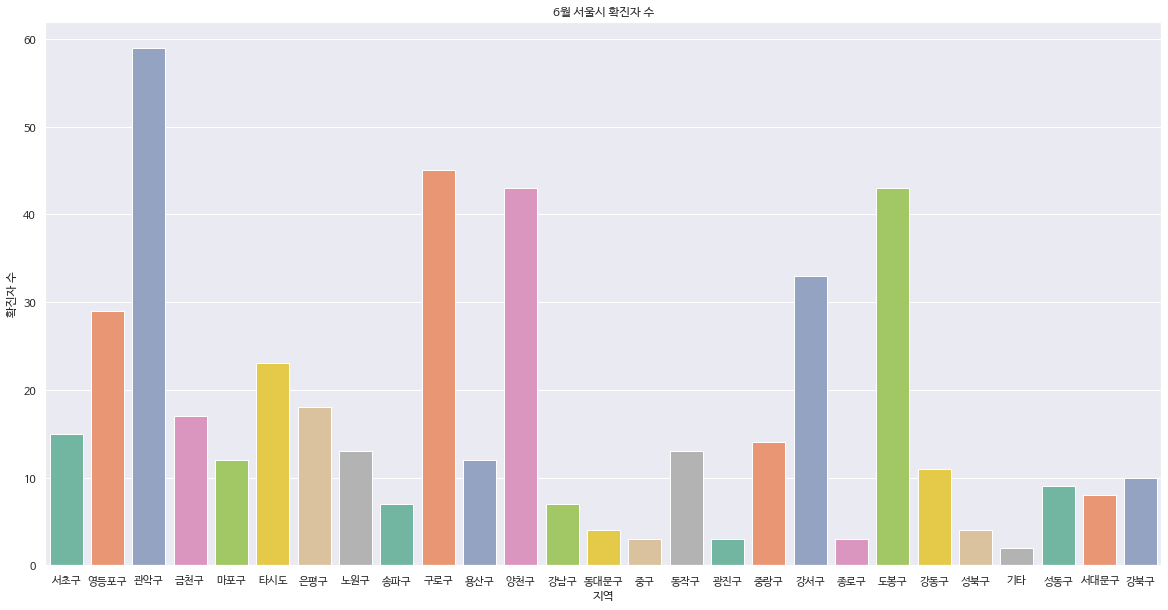

In [30]:
data1 = corona_del_data[corona_del_data['month']=='6']
plt.figure(figsize=(20,10))
sns.set(font="NanumBarunGothic", 
        rc={"axes.unicode_minus":False},
        style='darkgrid')

ax = sns.countplot(x='지역', data=data1, palette='Set2')

plt.xlabel("지역")
plt.ylabel("확진자 수")
plt.title("6월 서울시 확진자 수")
plt.show()

---